In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

OUT_DIR = "Graphs of Students_marks_advance"
os.makedirs(OUT_DIR, exist_ok=True)


stu = pd.read_excel("student_marks_advanced.xlsx")
stu.head()

,StudentID,Name,Gender,Class,Maths,Science,English,History,Computer
0,1,Aarav,Female,10A,29,75,72,96,26
1,2,Ishaan,Female,10C,47,58,20,85,68
2,3,Vihaan,Female,10B,82,67,36,77,64
3,4,Kabir,Female,10C,72,22,79,44,35
4,5,Arjun,Female,10A,21,63,59,40,81


In [85]:
subjects = ["Maths", "Science", "English", "History", "Computer"]
stu[subjects] = stu[subjects].apply(pd.to_numeric, errors="coerce").fillna(0)


stu["TotalMarks"] = stu[subjects].sum(axis=1)
stu["AverageMarks"] = (stu["TotalMarks"] / len(subjects)).round(2)


stu["Result"] = np.where((stu[subjects] >= 40).all(axis=1), "Pass", "Fail")


stu = stu.sort_values("TotalMarks", ascending=False).reset_index(drop=True)
stu["Rank"] = np.arange(1, len(stu)+1)

stu.head()


,StudentID,Name,Gender,Class,Maths,Science,English,History,Computer,TotalMarks,AverageMarks,Result,Rank
0,22,Krishna,Male,10C,53,93,92,92,99,429,85.8,Pass,1
1,11,Aditya,Male,10A,96,57,59,99,97,408,81.6,Pass,2
2,17,Aanya,Female,10C,99,57,82,70,73,381,76.2,Pass,3
3,6,Ananya,Male,10C,90,76,99,56,46,367,73.4,Pass,4
4,13,Yash,Female,10A,92,81,84,55,53,365,73.0,Pass,5


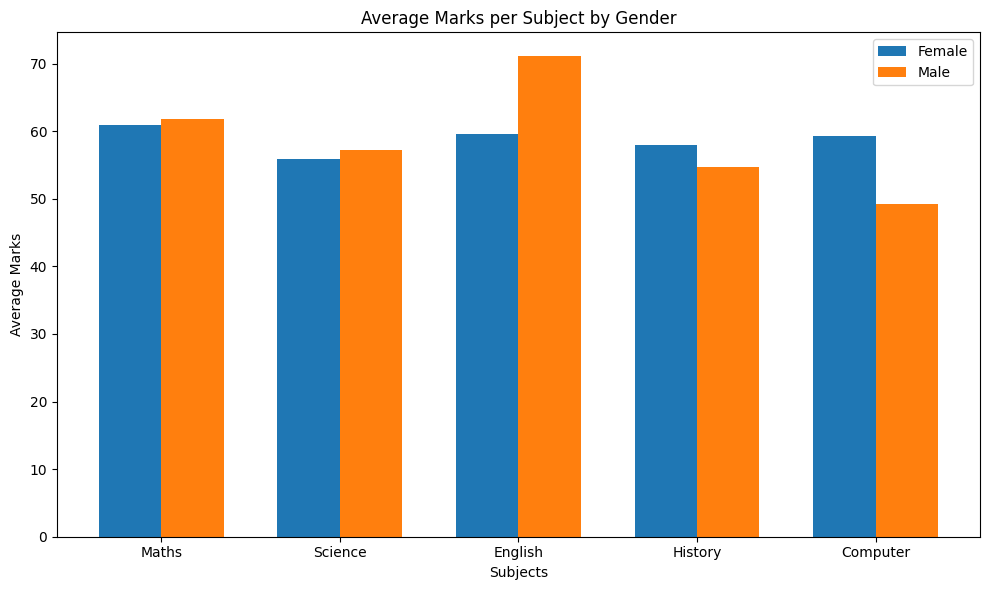

In [86]:
grouped = stu.groupby("Gender")[subjects].mean()

x = np.arange(len(subjects))
width = 0.35

plt.figure(figsize=(10,6))
for i, gender in enumerate(grouped.index):
    plt.bar(x + i*width, grouped.loc[gender], width=width, label=gender)

plt.xticks(x + width/2, subjects)
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.title("Average Marks per Subject by Gender")
plt.legend()
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/grouped_bar_gender.png")
plt.show()


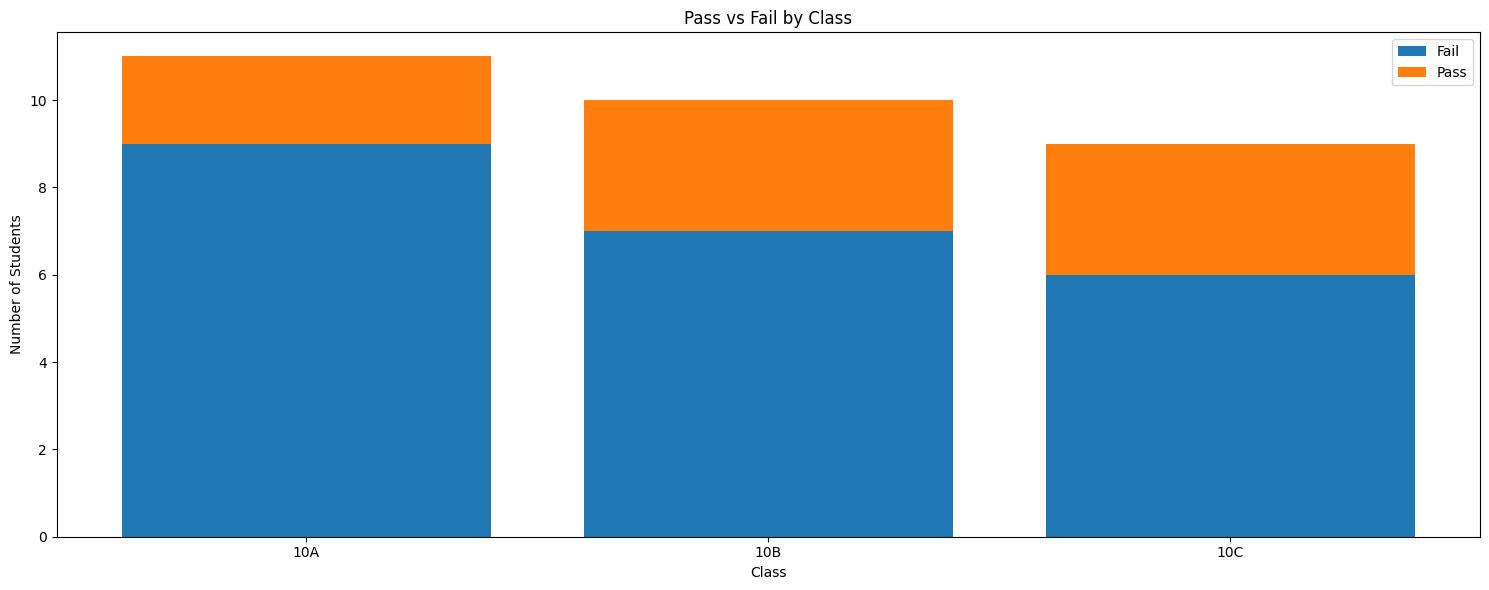

In [87]:
class_counts = stu.groupby(["Class","Result"]).size().unstack(fill_value=0)

plt.figure(figsize=(15,6))
bottom = np.zeros(len(class_counts))
for result in class_counts.columns:
    plt.bar(class_counts.index, class_counts[result], bottom=bottom, label=result)
    bottom += class_counts[result]

plt.xlabel("Class")
plt.ylabel("Number of Students")
plt.title("Pass vs Fail by Class")
plt.legend()
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/stacked_bar_class_result.png")
plt.show()


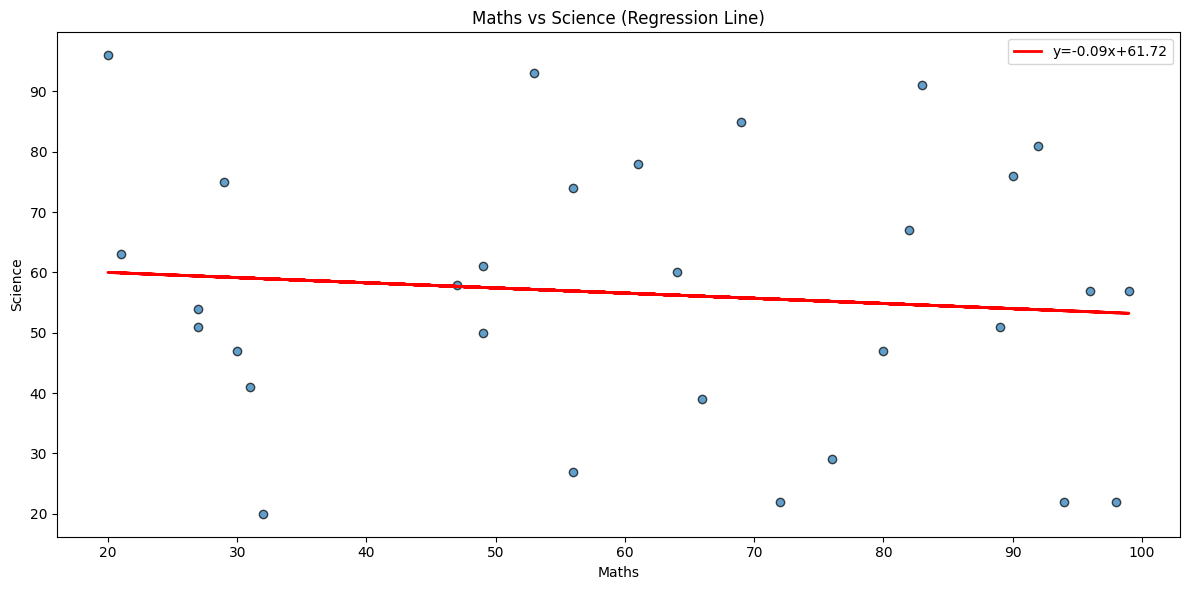

In [88]:
x = stu["Maths"].values
y = stu["Science"].values

coef = np.polyfit(x, y, 1)
poly_fn = np.poly1d(coef)

plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.7, edgecolors="k")
plt.plot(x, poly_fn(x), color="red", linewidth=2, label=f"y={coef[0]:.2f}x+{coef[1]:.2f}")
plt.xlabel("Maths")
plt.ylabel("Science")
plt.title("Maths vs Science (Regression Line)")
plt.legend()
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/scatter_regression.png")
plt.show()


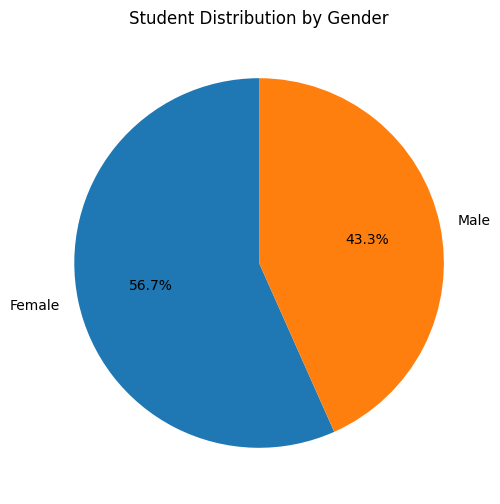

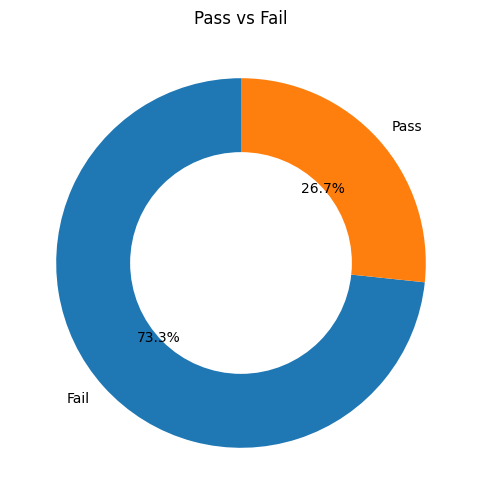

In [89]:
plt.figure(figsize=(6,6))
stu["Gender"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Student Distribution by Gender")
plt.ylabel("")
plt.savefig(f"{OUT_DIR}/pie_gender.png")
plt.show()



plt.figure(figsize=(6,6))
counts = stu["Result"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
centre = plt.Circle((0,0),0.6,fc="white")
plt.gca().add_artist(centre)
plt.title("Pass vs Fail")
plt.savefig(f"{OUT_DIR}/Pass_fail_pie.png")
plt.show()


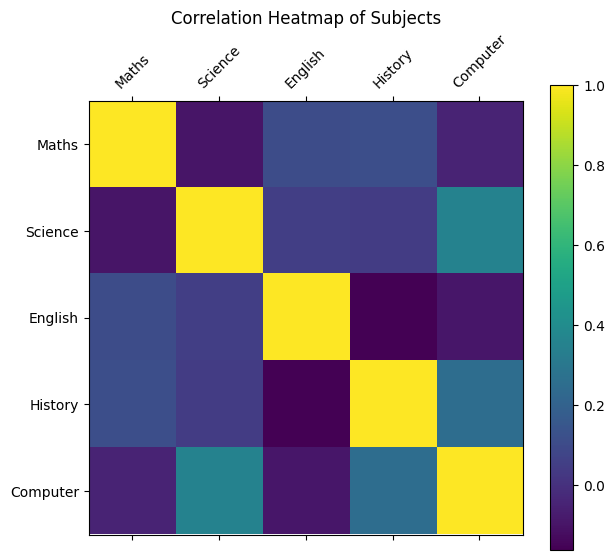

In [90]:
corr = stu[subjects].corr()

plt.figure(figsize=(7,6))
plt.matshow(corr, fignum=1, cmap="viridis")
plt.colorbar()
plt.xticks(range(len(subjects)), subjects, rotation=45)
plt.yticks(range(len(subjects)), subjects)
plt.title("Correlation Heatmap of Subjects")
plt.savefig(f"{OUT_DIR}/heatmap_corr.png")
plt.show()


<Figure size 800x600 with 0 Axes>

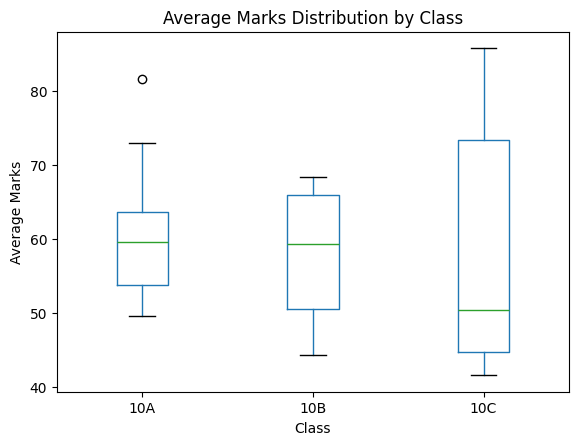

In [91]:
plt.figure(figsize=(8,6))
stu.boxplot(column="AverageMarks", by="Class", grid=False)
plt.title("Average Marks Distribution by Class")
plt.suptitle("")
plt.ylabel("Average Marks")
plt.savefig(f"{OUT_DIR}/boxplot_class_avg.png")
plt.show()


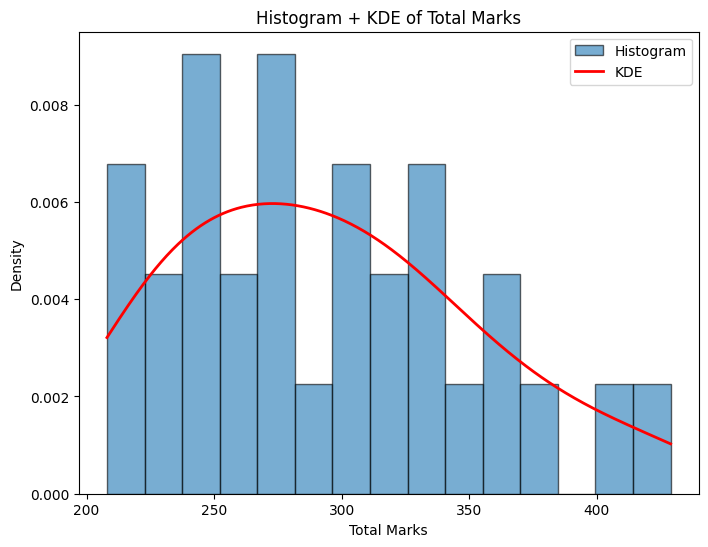

In [92]:
from scipy.stats import gaussian_kde
data = stu["TotalMarks"].values
kde = gaussian_kde(data)
xgrid = np.linspace(data.min(), data.max(), 500)

plt.figure(figsize=(8,6))
plt.hist(data, bins=15, density=True, alpha=0.6, edgecolor="black", label="Histogram")
plt.plot(xgrid, kde(xgrid), "r-", linewidth=2, label="KDE")
plt.title("Histogram + KDE of Total Marks")
plt.xlabel("Total Marks")
plt.ylabel("Density")
plt.legend()
plt.savefig(f"{OUT_DIR}/histogram_kde.png")
plt.show()


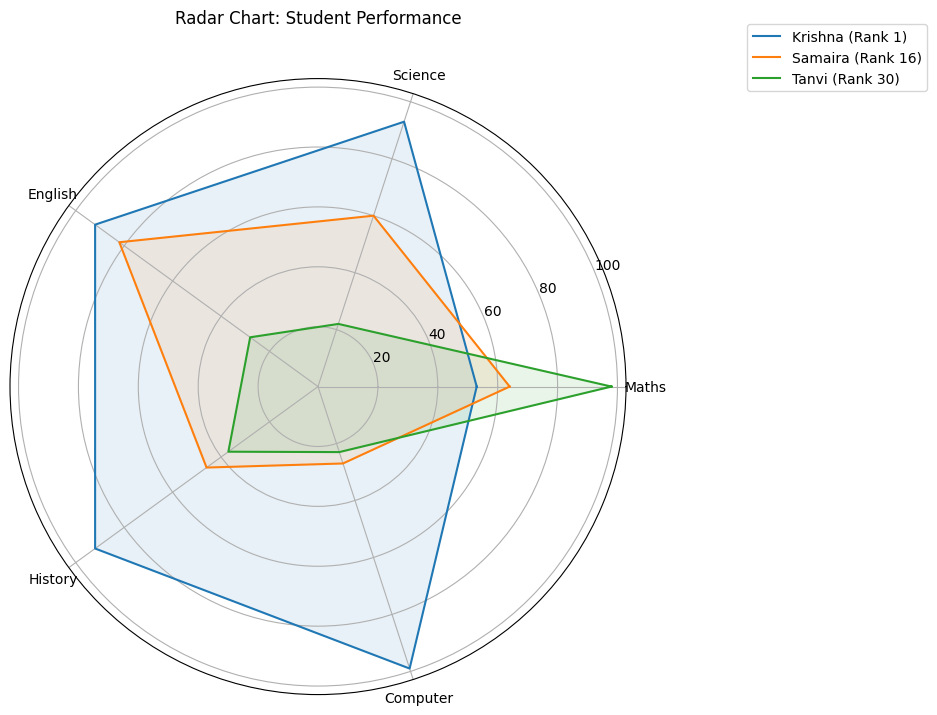

In [93]:
top = stu.iloc[0]
mid = stu.iloc[len(stu)//2]
low = stu.iloc[-1]
students = [top, mid, low]

labels = subjects
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(15,8))
ax = plt.subplot(111, polar=True)
for stu in students:
    values = stu[subjects].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"{stu['Name']} (Rank {stu['Rank']})")
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Radar Chart: Student Performance",pad = 40)
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1.1))
plt.savefig(f"{OUT_DIR}/radar_chart.png")
plt.show()


In [ ]:
#seaborn